In [48]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [ ]:
iris = load_iris()
X, y= iris.data, iris.target

In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [100]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

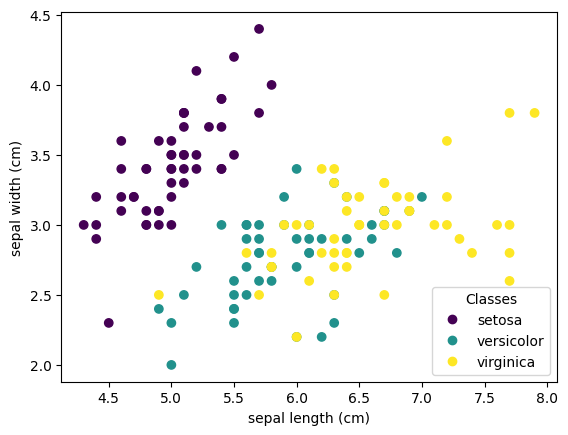

In [50]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

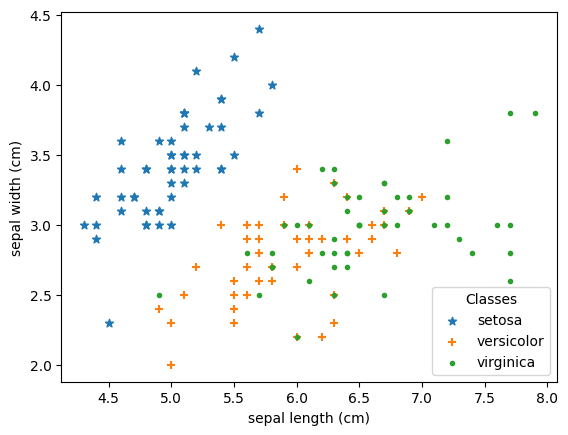

In [102]:
_, ax = plt.subplots()

scatter0 = ax.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1], marker='*', label=iris.target_names[0])

scatter1 = ax.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1], marker='+', label=iris.target_names[1])

scatter2 = ax.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1], marker='.', label=iris.target_names[2])

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

_ = ax.legend(handles=[scatter0, scatter1, scatter2], loc="lower right", title="Classes")


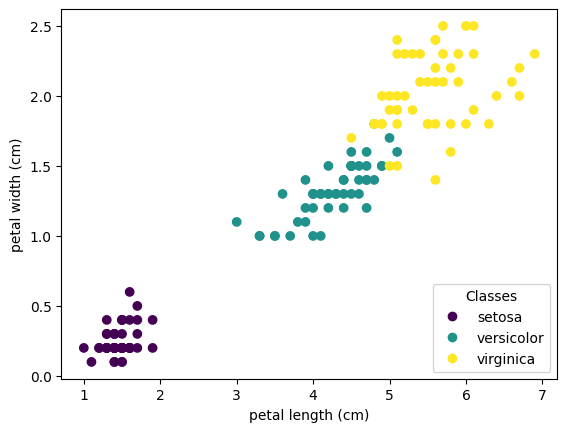

In [51]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

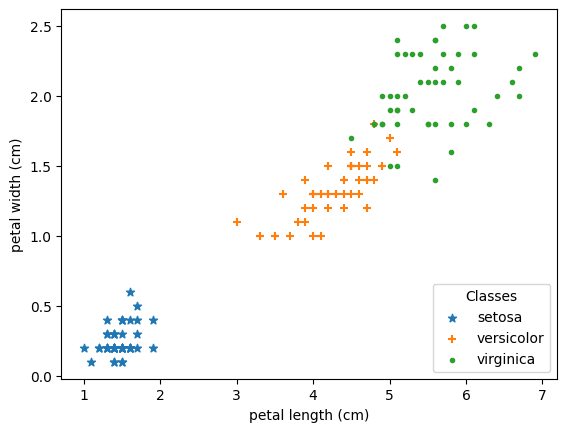

In [104]:
_, ax = plt.subplots()

markers = ['*', '+', '.']  # List of markers. 'o' is circle, 's' is square, '^' is triangle_up
for i, marker in enumerate(markers):
    scatter = ax.scatter(iris.data[iris.target == i, 2], iris.data[iris.target == i, 3], marker=marker)

ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(iris.target_names, loc="lower right", title="Classes")


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [55]:
#OneHotEncoder
encoder = OneHotEncoder()

y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val_encoded = encoder.fit_transform(y_val.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()


In [56]:
# Create a model
model = Sequential()

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(4,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(3, activation='softmax'))

validation_data = (X_val, y_val_encoded)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
fit= model.fit(X_train, y_train_encoded, validation_data=validation_data, epochs=100, batch_size=1)


Epoch 1/100


96/96 [==============================] - 1s 4ms/step - loss: 4.3253 - accuracy: 0.6667 - val_loss: 3.1346 - val_accuracy: 0.8333
Epoch 2/100
96/96 [==============================] - 0s 1ms/step - loss: 2.4095 - accuracy: 0.7917 - val_loss: 2.0115 - val_accuracy: 0.6667
Epoch 3/100
96/96 [==============================] - 0s 1ms/step - loss: 1.7350 - accuracy: 0.8229 - val_loss: 1.6897 - val_accuracy: 0.7083
Epoch 4/100
96/96 [==============================] - 0s 1ms/step - loss: 1.4848 - accuracy: 0.8958 - val_loss: 1.5374 - val_accuracy: 0.7083
Epoch 5/100
96/96 [==============================] - 0s 1ms/step - loss: 1.3129 - accuracy: 0.8958 - val_loss: 1.2698 - val_accuracy: 0.9583
Epoch 6/100
96/96 [==============================] - 0s 1ms/step - loss: 1.1840 - accuracy: 0.9583 - val_loss: 1.1574 - val_accuracy: 0.9583
Epoch 7/100
96/96 [==============================] - 0s 1ms/step - loss: 1.1235 - accuracy: 0.8854 - val_loss: 1.0908 - val_accuracy: 0.9167
Epoch 8/100
96/96 [======

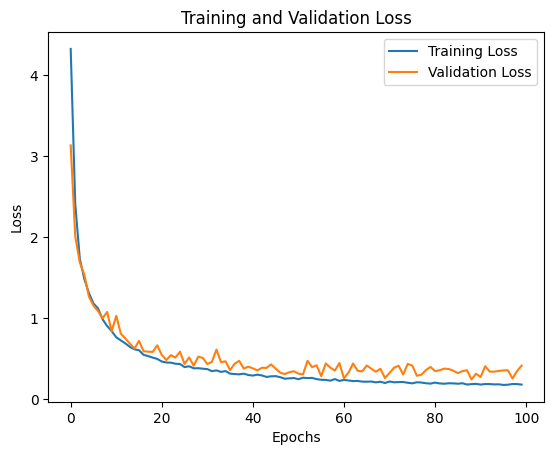

In [59]:


# Get the training and validation loss from the History object
train_loss = fit.history['loss']
val_loss = fit.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [62]:
from keras import initializers
validation_data = (X_val, y_val_encoded)

In [90]:



def test_initializers(initializers_list, x_train, y_train,X_val, y_val_encoded, x_test, y_test, epochs, batch_size):
    accuracies = []
    validation_data = (X_val, y_val_encoded)
    for init in initializers_list:

        model = Sequential()

        model.add(Dense(64,kernel_initializer=init, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(4,)))
        model.add(Dense(64,kernel_initializer=init, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(3,kernel_initializer=init, activation='softmax'))


        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history= model.fit(X_train, y_train_encoded, validation_data=validation_data, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model
        _, accuracy = model.evaluate(x_test, y_test, verbose=0)
        accuracies.append(accuracy)

        train_loss = history.history['loss']
        val_loss =history.history['val_loss']

        plt.plot(train_loss, label='Training Loss',linestyle='-')
        plt.plot(val_loss, label='Validation Loss',linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss for {init} Weight Initializer')
        plt.legend()
        plt.show()

    plt.figure(figsize=(15, 6))
    bar_plot=plt.bar([str(init) for init in initializers_list], accuracies,width=0.5)
    for bar in bar_plot:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/3.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment
    plt.xlabel('Initializers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for different weight initializers')
    plt.show()




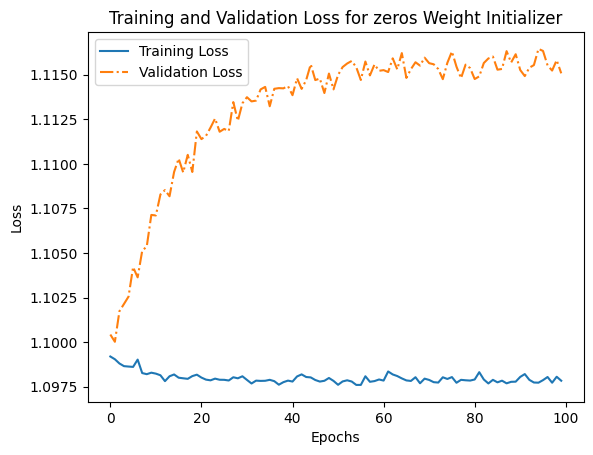

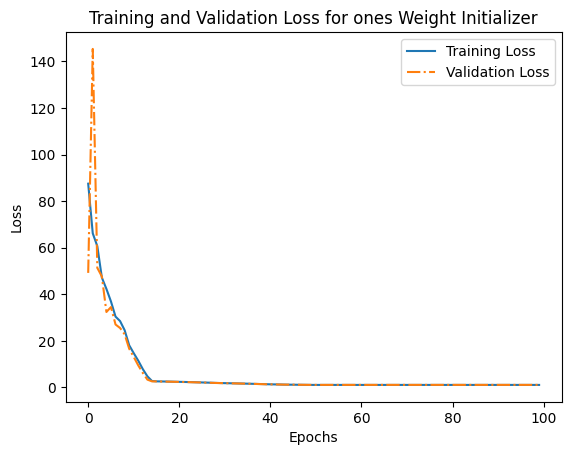

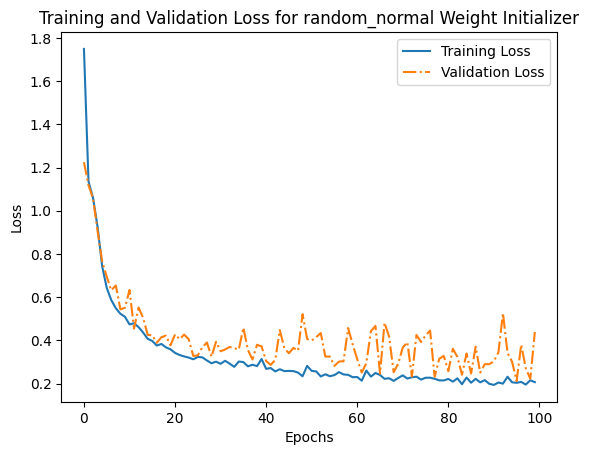

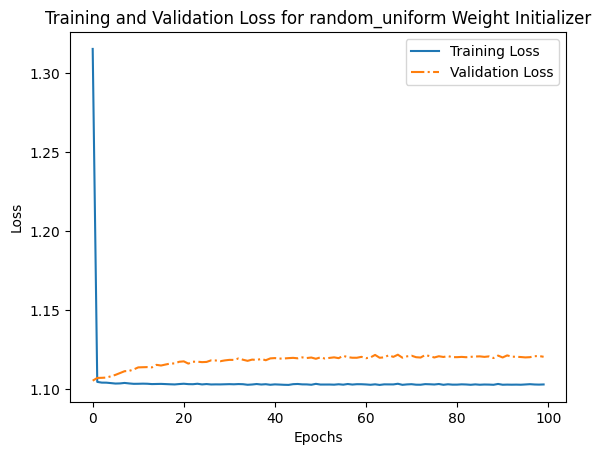

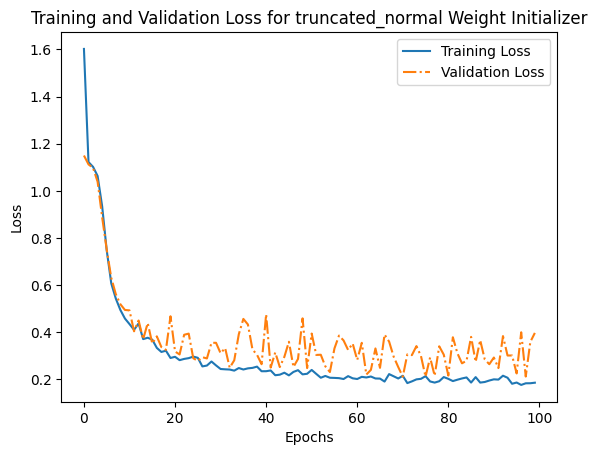

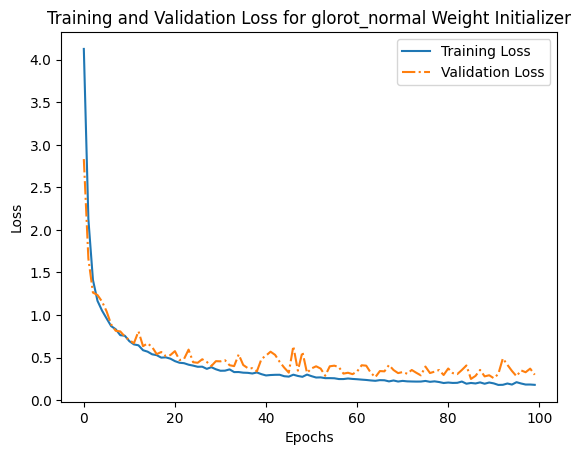

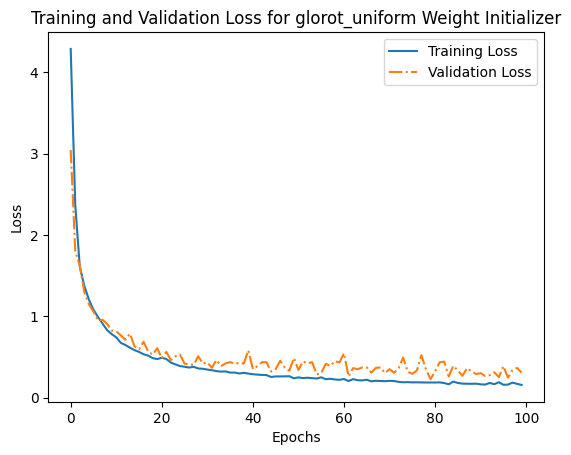

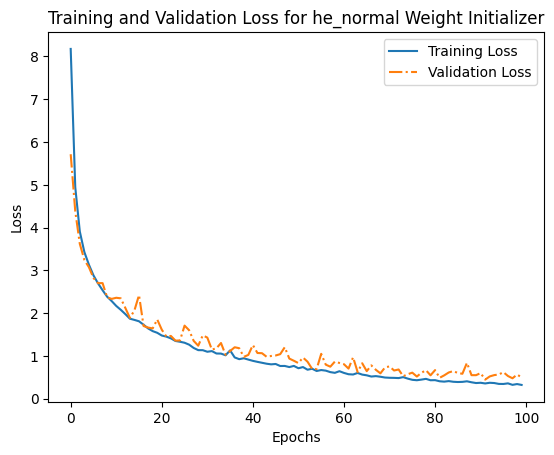

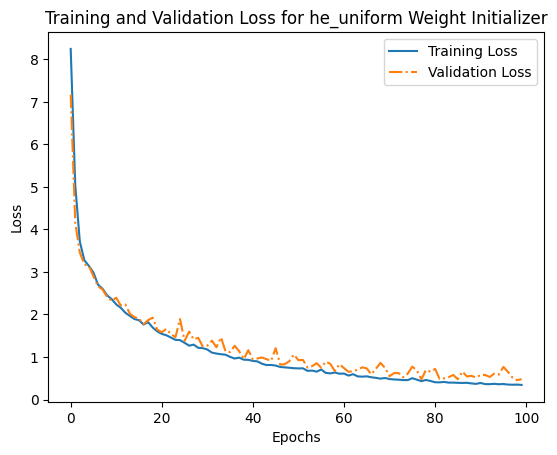

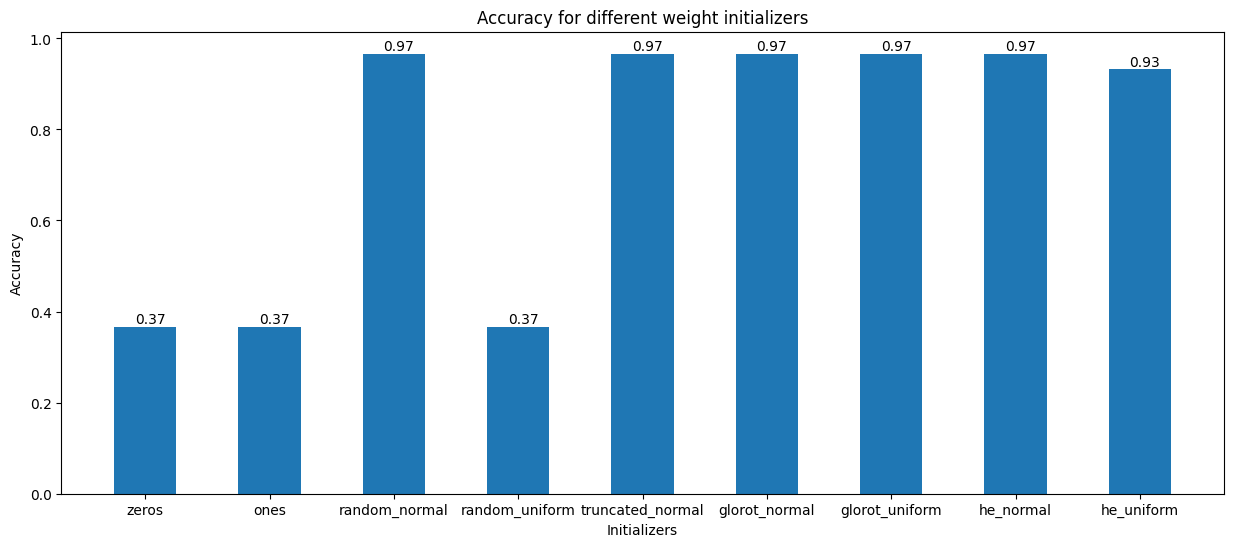

In [97]:
# List of initializers to test
initializers_list = ['zeros', 'ones', 'random_normal', 'random_uniform', 'truncated_normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

# Call the function
test_initializers(initializers_list, X_train, y_train_encoded,X_val, y_val_encoded, X_test, y_test_encoded, epochs=100, batch_size=1)